In [1]:
import sys, os, time
from pathlib import Path
# %pdb
os.environ["CUDA_VISIBLE_DEVICES"]="0"
# os.environ['OMNIDATA_PATH'] = '/is/ei/fleeb/workspace/local_data'
os.environ['OMNIDATA_PATH'] = r'C:\Users\anwan\Documents\workspace\local_data'
%load_ext autoreload
%autoreload 2

import omnifig as fig
fig.initialize('mnist')

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim as O
# import torch.distributions as distrib
import torch.multiprocessing as mp
import torchvision.models
import torchvision
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm_notebook as tqdm
import gym
import json
import shutil
import inspect
import numpy as np
import h5py as hf

%matplotlib inline
# %matplotlib tk
import matplotlib.pyplot as plt
import seaborn as sns
#plt.switch_backend('Qt5Agg') #('Qt5Agg')
import omnilearn as learn
from omnilearn import op
from omnilearn import models
from omnilearn import util
from omnilearn.util import distributions as distrib
# from foundation import sim as SIM
#from foundation.util import replicate, Cloner
from scipy import stats
# fig.initialize()
np.set_printoptions(linewidth=120)

In [2]:
from omnilearn import util
from omnidata.datasets import MNIST

Missing bits-back dependencies for lossless compression task (code can be found at https://github.com/bits-back/bits-back, and then copied using the "community-source" script).
ERROR:C:\Users\anwan\OneDrive\Khan\research\plethora\plethora\tasks\compression\__init__.py: Missing bits-back dependencies for lossless compression task (code can be found at https://github.com/bits-back/bits-back, and then copied using the "community-source" script).


In [3]:
dataset = MNIST()
len(dataset)

60000

In [4]:
dataset.prepare()

C:\Users\anwan\anaconda3\lib\site-packages\torch\nn\functional.py:3454: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn(


mnist[60000]

In [6]:
batch = dataset.get_batch(batch_size=32)
batch

Batch{mnist}[32]

In [7]:
batch.available_buffers()

['observation', 'target']

In [8]:
X = batch['observation']
X.shape

torch.Size([32, 1, 32, 32])

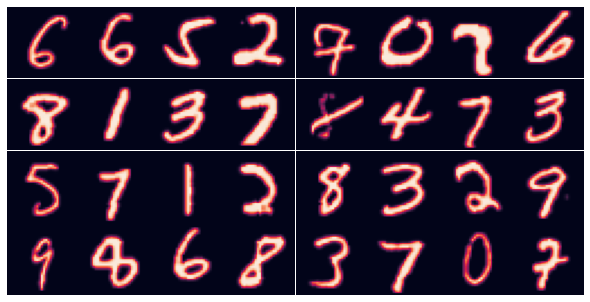

In [9]:
util.plot_imgs(X);